## High-pass filter : edge detection

In [85]:
# Import modules
import cv2
import matplotlib.pyplot as plt
from skimage import filters

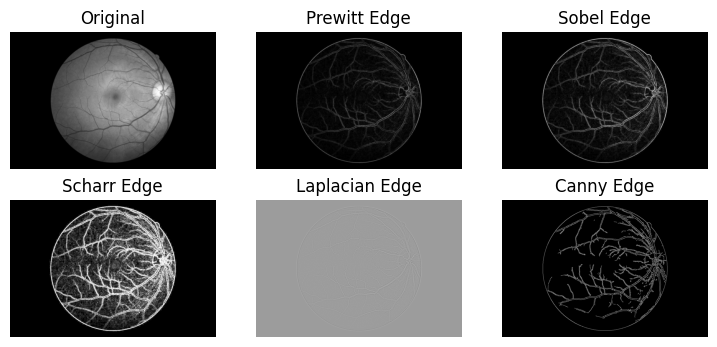

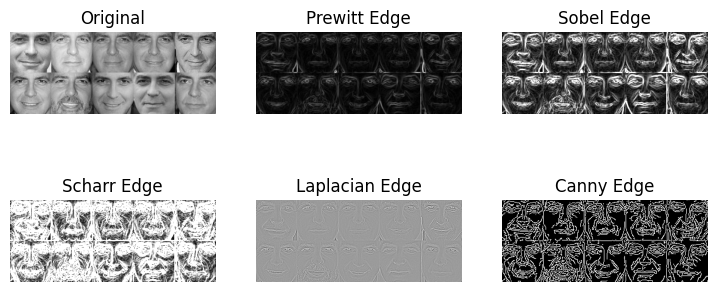

In [86]:
def compute_edge(image_name: str) -> None:
    """ Edge Detection using different filter """
    
    image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    
    # For each filter change ksize to see different effect
    image_prewitt_skimage = filters.prewitt(image)
    #image_sobel_skimage = filters.sobel(image)
    
    image_laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=1)
    image_sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    image_sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    image_sobel_magnitude = cv2.magnitude(image_sobelx, image_sobely)
    image_sobel_magnitude = cv2.convertScaleAbs(image_sobel_magnitude) # Values in [0, 255]
    image_scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    image_scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    image_scharr_magnitude = cv2.magnitude(image_scharrx, image_scharry)
    image_scharr_magnitude = cv2.convertScaleAbs(image_scharr_magnitude) # Values in [0, 255]
    image_canny = cv2.Canny(image,50, 100)
    
    # Plot results
    fig, axes = plt.subplots(2, 3, figsize=(9, 4))
    
    axes[0,0].imshow(image, cmap='gray')
    axes[0,0].set_title("Original")
    axes[0,0].axis('off')  # hide axes
    
    axes[0,1].imshow(image_prewitt_skimage, cmap='gray')
    axes[0,1].set_title("Prewitt Edge")
    axes[0,1].axis('off') 
    
    axes[0,2].imshow(image_sobel_magnitude, cmap='gray')
    axes[0,2].set_title("Sobel Edge")
    axes[0,2].axis('off')  
    
    axes[1,0].imshow(image_scharr_magnitude, cmap='gray')
    axes[1,0].set_title("Scharr Edge")
    axes[1,0].axis('off')  
    
    axes[1,1].imshow(image_laplacian, cmap='gray')
    axes[1,1].set_title("Laplacian Edge")
    axes[1,1].axis('off') 
    
    axes[1,2].imshow(image_canny, cmap='gray')
    axes[1,2].set_title("Canny Edge")
    axes[1,2].axis('off') 
    
    plt.show()
    
retina = "Images/database2/retina.jpg"
clooney = "Images/database2/clooney.png"
compute_edge(retina)
compute_edge(clooney)

# Try LoG later